# Tutorial 3

In [2]:
%load_ext autoreload

%autoreload 2
import pycosat as sat
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
from numpy.random import choice
import multiprocessing as mp

## 3SAT Problem

Zmienne: `p, q, r`

In [3]:
# Sformułowanie problemu jako CNF
cnf_base = [
    [1, 2, -3],
    [-1, -2, 3],
    [-1, -2, -3],
    [-1, 2, -3],
    [-1, 2, 3],
    [1, -2, -3]
]

In [4]:
def rand_sat(N, M, k):
    return [np.sort((choice(N, k, replace=False)+1) * choice([-1, 1])).tolist() for m in range(M)]

In [5]:
def solve_cnf(cnf):
    try:
        solved = 0
        for sol in sat.itersolve(cnf):
            print(sol)
            solved += 1
        return solved
    except:
        print("unSAT")
        return None

In [6]:
def solve(cnf):
    s = sat.solve(cnf)
    if s == "UNSAT":
        return 0
    else:
        return 1

In [7]:
N = 50
M = 10
k = 3
cnf_rand = rand_sat(N, M, k)
cnf_rand

[[5, 14, 41],
 [-45, -36, -24],
 [-31, -20, -17],
 [-41, -36, -32],
 [-22, -8, -7],
 [-41, -24, -22],
 [20, 23, 32],
 [12, 20, 25],
 [-30, -12, -8],
 [-39, -21, -3]]

In [8]:
# r = solve_cnf(cnf_rand)
# r

## Task 2

In [9]:
# N = 100
# K = [2, 3]
# F = np.linspace(0.5, 6.0, 30)
# plt.rcParams.update({"text.usetex": True, "font.family": "Helvetica"})
# for k in K:
#     res = []
#     for f in F:
#         M = int(f * N)
#         nsamp = 100
#         cnf_2 = [rand_sat(N, M, k) for m in range(nsamp)]
#         val = np.sum([solve(exp) for exp in cnf_2])
#         val = val/N
#         res.append(val)
    
#     plt.plot(F, res, label=f"k = {k}")
# plt.xlabel("f = $M/N$", fontsize=12)
# plt.ylabel("Ratio", fontsize=12)
# plt.legend()
# plt.show()


n = 50
n = 100
n = 150


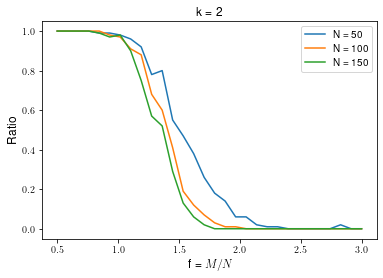

n = 50
n = 100
n = 150


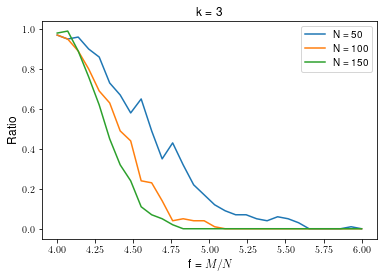

CPU times: user 1min 39s, sys: 383 ms, total: 1min 40s
Wall time: 1min 41s


In [10]:
%%time
N = [50, 100, 150]
K = [2, 3]
nsamp = 100
plt.rcParams.update({"text.usetex": True, "font.family": "Helvetica"})
for k in K:
    if k == 2:
        F = np.linspace(0.5, 3.0, 30)
    else:
        F = np.linspace(4.0, 6, 30)
    plt.title(f"k = {k}")
    for n in N:
        res = []
        print(f"n = {n}")
        for f in F:
            M = int(f * n)
            cnf_2 = [rand_sat(n, M, k) for m in range(nsamp)]
            val = np.sum([solve(exp) for exp in cnf_2])
            val = val/nsamp
            res.append(val)
        plt.plot(F, res, label=f"N = {n}")
    plt.xlabel("f = $M/N$", fontsize=12)
    plt.ylabel("Ratio", fontsize=12)
    plt.legend()
    plt.show()